# Data acquisition

In [1]:
import pyodbc 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [2]:
#Carga Ordenes
strqueryOrders = 'C:/Users/KRosa/Downloads/TP Final DS/olist_orders_dataset.csv'
#Carga Lineas de pedido de cada orden
strqueryOrderItems = 'C:/Users/KRosa/Downloads/TP Final DS/olist_order_items_dataset.csv'
#Carga Productos
strqueryProductos = 'C:/Users/KRosa/Downloads/TP Final DS/olist_products_dataset.csv'
#Carga Vendedores
strquerySellers = 'C:/Users/KRosa/Downloads/TP Final DS/olist_sellers_dataset.csv'
#Carga Pagos de ordenes
strqueryPayments = 'C:/Users/KRosa/Downloads/TP Final DS/olist_order_payments_dataset.csv'
#Carga Reviews
strqueryReviews = 'C:/Users/KRosa/Downloads/TP Final DS/olist_order_reviews_dataset.csv'

dfOrders = pd.read_csv(strqueryOrders, sep = ",")
dfOrderItems = pd.read_csv(strqueryOrderItems, sep = ",")
dfOrderProds = pd.read_csv(strqueryProductos, sep = ",")
dfOrderSellers = pd.read_csv(strquerySellers, sep = ",")
dfOrderPayments = pd.read_csv(strqueryPayments, sep = ",")
dfOrderReviews = pd.read_csv(strqueryReviews, sep = ",")


## EDA

In [3]:
dfOrders.head().round()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
dfOrderItems.head().round()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,59.0,13.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,240.0,20.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,18.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,13.0,13.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,200.0,18.0


In [5]:
dfOrderProds.head().round()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
dfOrderSellers.head().round()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
dfOrderPayments.head().round()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,66.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,108.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.0


In [8]:
dfOrderReviews.head().round()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
#Dimension del dataset
print('Shape Ordenes: ', dfOrders.shape)
print('Shape Items por orden: ', dfOrderItems.shape)
print('Shape Productos: ', dfOrderProds.shape)
print('Shape Sellers: ', dfOrderSellers.shape)
print('Shape Pagos: ', dfOrderPayments.shape)
print('Shape Reviews: ', dfOrderReviews.shape)


Shape Ordenes:  (99441, 8)
Shape Items por orden:  (112650, 7)
Shape Productos:  (32951, 9)
Shape Sellers:  (3095, 4)
Shape Pagos:  (103886, 5)
Shape Reviews:  (100000, 7)


In [10]:
#Nombre de los atributos
dfOrders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [11]:
dfOrderItems.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [12]:
dfOrderProds.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [13]:
dfOrderSellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [14]:
dfOrderPayments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [15]:
dfOrderReviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [16]:
#Tipo de dato para cada columna
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
dfOrderItems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Existen columnas sin datos. La conclusión temprana es que son aquellos pedidos que están pendientes de aprobacion y/o entrega

In [18]:
dfOrderProds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [19]:
dfOrderSellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [20]:
dfOrderPayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
dfOrderReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [22]:
#Desactivo warnings para facilitar lectura
import warnings
warnings.filterwarnings("ignore")

In [23]:
#Primeras estadisticas
dfOrders.describe().round()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,9440c562cbc95c1641f816823dfb165c,22f9f88866a23edb1a9a66be3970fcf7,delivered,2018-07-28 13:11:22,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [24]:
dfOrderItems.describe().round()

,order_item_id,price,freight_value
count,112650.0,112650.0,112650.0
mean,1.0,121.0,20.0
std,1.0,184.0,16.0
min,1.0,1.0,0.0
25%,1.0,40.0,13.0
50%,1.0,75.0,16.0
75%,1.0,135.0,21.0
max,21.0,6735.0,410.0


In [25]:
dfOrderProds.describe().round()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.0,32341.0,32341.0,32949.0,32949.0,32949.0,32949.0
mean,48.0,771.0,2.0,2276.0,31.0,17.0,23.0
std,10.0,635.0,2.0,4282.0,17.0,14.0,12.0
min,5.0,4.0,1.0,0.0,7.0,2.0,6.0
25%,42.0,339.0,1.0,300.0,18.0,8.0,15.0
50%,51.0,595.0,1.0,700.0,25.0,13.0,20.0
75%,57.0,972.0,3.0,1900.0,38.0,21.0,30.0
max,76.0,3992.0,20.0,40425.0,105.0,105.0,118.0


In [26]:
dfOrderSellers.describe().round()

,seller_zip_code_prefix
count,3095.0
mean,32291.0
std,32713.0
min,1001.0
25%,7094.0
50%,14940.0
75%,64552.0
max,99730.0


In [27]:
dfOrderPayments.describe().round()

,payment_sequential,payment_installments,payment_value
count,103886.0,103886.0,103886.0
mean,1.0,3.0,154.0
std,1.0,3.0,217.0
min,1.0,0.0,0.0
25%,1.0,1.0,57.0
50%,1.0,1.0,100.0
75%,1.0,4.0,172.0
max,29.0,24.0,13664.0


In [28]:
dfOrderReviews.describe().round()

,review_score
count,100000.0
mean,4.0
std,1.0
min,1.0
25%,4.0
50%,5.0
75%,5.0
max,5.0


## Analisis Univariado

<AxesSubplot:xlabel='price', ylabel='Density'>

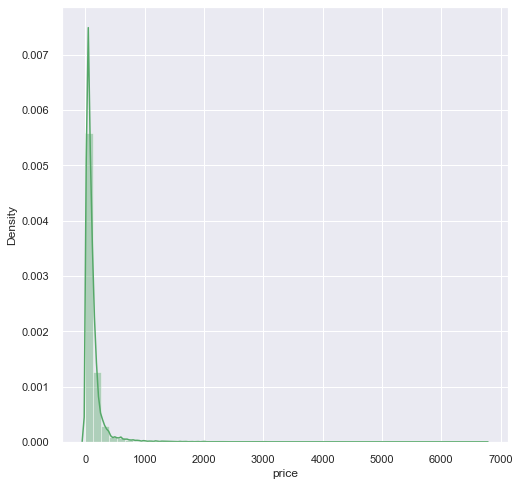

In [38]:
#Histograma

sns.set_theme()
sns.set(rc={"figure.figsize": (8, 8)})
Installements=dfOrderItems['price'].dropna()

distplot(dfOrderItems.price, hist=True, color="g")

<AxesSubplot:xlabel='payment_installments', ylabel='Density'>

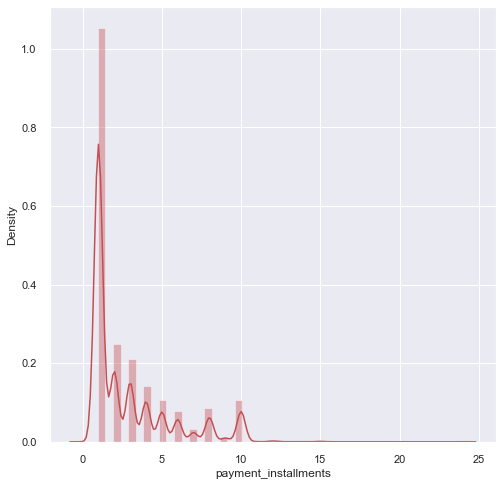

In [39]:
#Histograma
from seaborn import distplot
sns.set_theme()
sns.set(rc={"figure.figsize": (8, 8)})
Installements=dfOrderPayments['payment_installments'].dropna()

distplot(dfOrderPayments.payment_installments, hist=True, color="r")

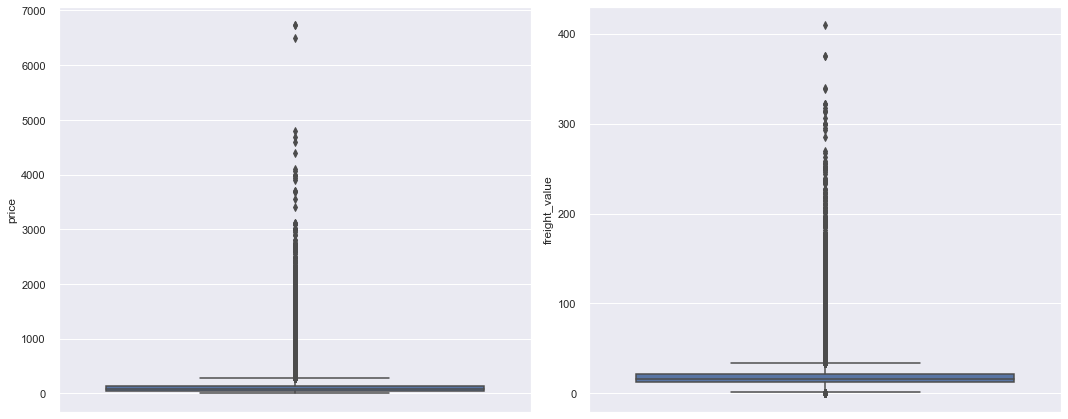

In [41]:
#Relacion entre precio y Flete
variables = ['price', 'freight_value']

fig, axes = plt.subplots(1, 2, figsize=(15,6))

for ax, variable in zip(axes, variables):
    ax = sns.boxplot( y=variable, data=dfOrderItems, ax=ax)
plt.tight_layout()

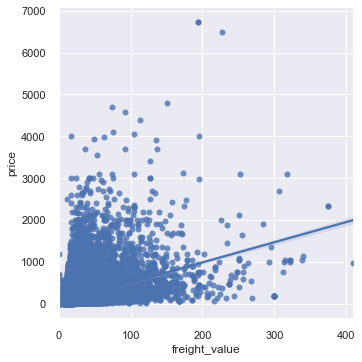

In [40]:
#Relacion entre precio y Flete
from seaborn import lmplot
lmplot(x='freight_value', y='price', data=dfOrderItems, fit_reg=True) 

### Conclusion 1

En este caso están claramente actuando causas asignables de variación que habrá que resolver si queremos conseguir un alto grado de fiabilidad del proceso. 
Distribución asimétrica positiva.
Outliers en precio y freight_value (flete)

In [31]:
import pandas_profiling
from pandas_profiling import ProfileReport

report = ProfileReport(dfOrderItems)

print(repr(report.report))

report.to_widgets()


Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]